In [215]:
import numpy as np
from collections import Counter

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k = 3):
        self.k = k
    
    def fit(self, train_signals, train_labels):
        self.train_signals = train_signals
        self.train_labels = train_labels
    
    def predict(self, signals):
        predictions = [self._predict(signal) for signal in signals]
        return predictions
        
    def _predict(self,signal):
        distances = [distance(signal, test_signal) for test_signal in self.train_signals]
        sorted_indices = np.argsort(distances)
        k_nearest_indices = sorted_indices[:self.k]
        k_nearest_train_labels = [self.train_labels[i] for i in k_nearest_indices]
        
        most_common = Counter(k_nearest_train_labels).most_common()
        return most_common[0][0]
        
    



In [216]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(y_true, y_pred):
    print(f'Accuracy   : {accuracy_score(y_true, y_pred):.2f}')
    print(f'Precision  : {precision_score(y_true, y_pred):.2f}')
    print(f'Recall     : {recall_score(y_true, y_pred):.2f}')
    print(f'F1-score   : {f1_score(y_true, y_pred):.2f}')

B - benign (gerybinis)
M - malignant (piktybinis)

In [217]:
import pandas as pd

df = pd.read_csv('breast_cancer.csv')
df['encoded_diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,encoded_diagnosis
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [218]:
df.columns.tolist()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32',
 'encoded_diagnosis']

In [219]:
df.info()
df[df.columns.tolist()].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,encoded_diagnosis
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN,1.000000


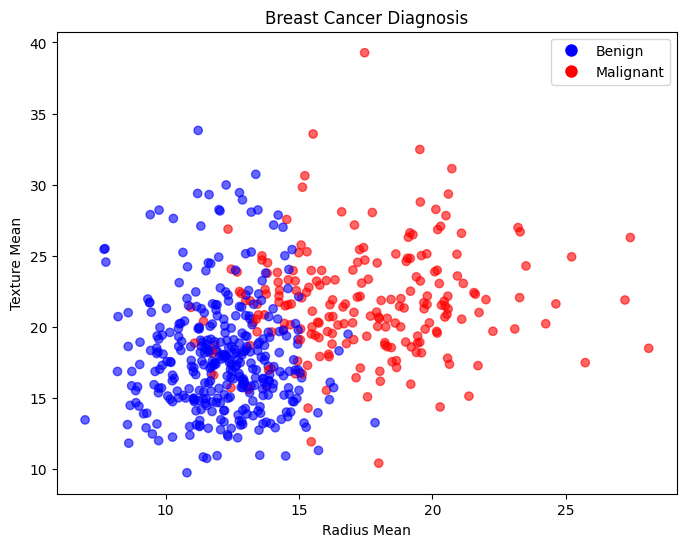

In [220]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
colors = {'B': 'blue', 'M': 'red'}

plt.scatter(df['radius_mean'], df['texture_mean'], 
            c=df['diagnosis'].map(colors), alpha=0.6)

plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.title('Breast Cancer Diagnosis')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label='Benign',
                              markerfacecolor='blue', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', label='Malignant',
                              markerfacecolor='red', markersize=10)])
plt.show()


In [221]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


features = ['radius_mean', 'texture_mean']
X = df[features].values
y = df['encoded_diagnosis'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

train_indexes, test_indexes = train_test_split(range(len(df)), random_state=42)
y_train, y_test = y[train_indexes], y[test_indexes]

X_train, X_test = X[train_indexes], X[test_indexes]


In [222]:
def plot_classification(X_test, y_test, y_pred):
    plt.figure(figsize=(8,6))

    # True classes
    colors = ['blue' if label == 0 else 'red' for label in y_test]
    plt.scatter(X_test[:, 0], X_test[:, 1], c=colors, alpha=0.6)

    # Misclassified points
    for i in range(len(X_test)):
        if y_pred[i] != y_test[i]:
            plt.scatter(X_test[i, 0], X_test[i, 1], c='yellow', marker='x', s=100, label='Misclassified' if i == 0 else "")

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.grid(True)
    plt.show()

Test set:
Accuracy   : 0.87
Precision  : 0.86
Recall     : 0.78
F1-score   : 0.82


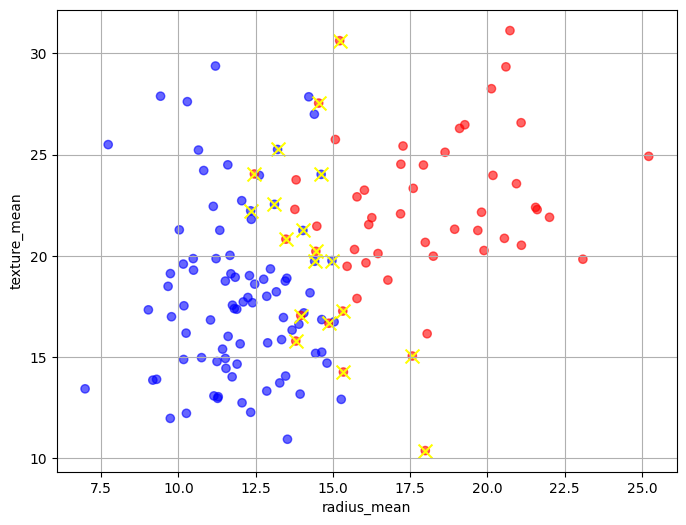

In [223]:

custom_knn = KNN(k=5)
custom_knn.fit(X_train, y_train)

y_pred = custom_knn.predict(X_test)

print('Test set:')
print_metrics(y_test, y_pred)

plot_classification(X_test,y_test,y_pred)






Test set:
Accuracy   : 0.87
Precision  : 0.86
Recall     : 0.78
F1-score   : 0.82


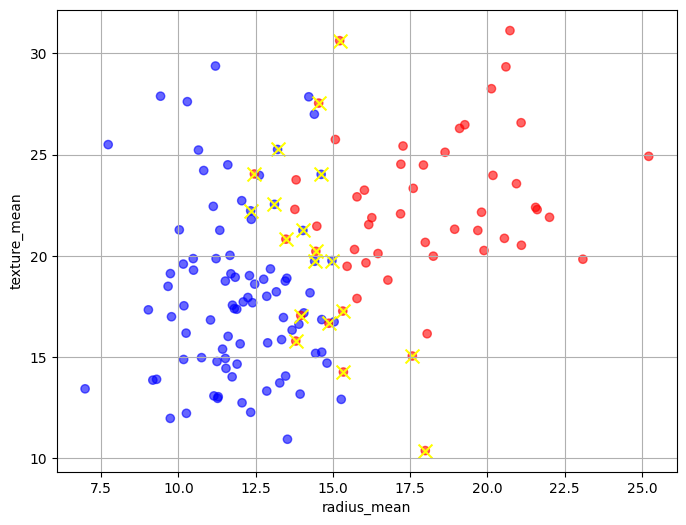

In [224]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Test set:')
print_metrics(y_test, y_pred)

plot_classification(X_test,y_test,y_pred)



In [225]:
# from sklearn.linear_model import LogisticRegression

# train_indexes, test_indexes = train_test_split(range(len(df)), random_state=100)
# y_train, y_test = y[train_indexes], y[test_indexes]
# X_train, X_test = X[train_indexes], X[test_indexes]


Training set:
Accuracy   : 0.89
Precision  : 0.88
Recall     : 0.82
F1-score   : 0.85

Test set:
Accuracy   : 0.90
Precision  : 0.92
Recall     : 0.81
F1-score   : 0.86


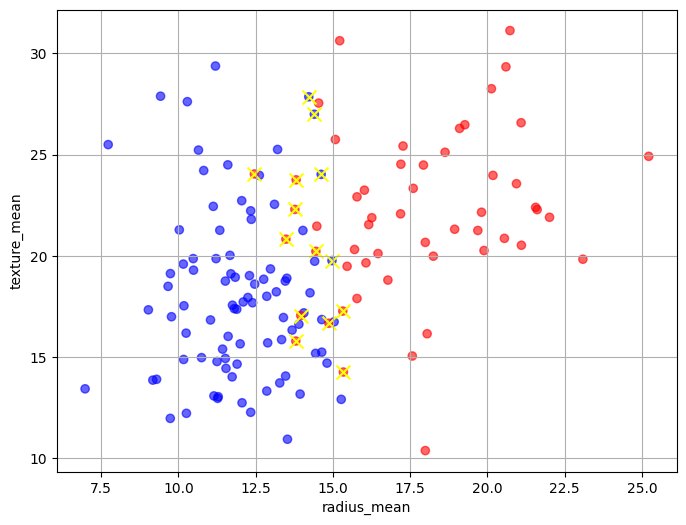

In [ ]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(penalty=None)
lr1.fit(X_train, y_train)

print('Training set:')
print_metrics(y_train, lr1.predict(X_train))
print()
print('Test set:')
print_metrics(y_test, lr1.predict(X_test))

y_pred = lr1.predict(X_test)
plot_classification(X_test,y_test,y_pred)



Training set:
Accuracy   : 0.95
Precision  : 0.95
Recall     : 0.91
F1-score   : 0.93

Test set:
Accuracy   : 0.94
Precision  : 0.91
Recall     : 0.94
F1-score   : 0.93


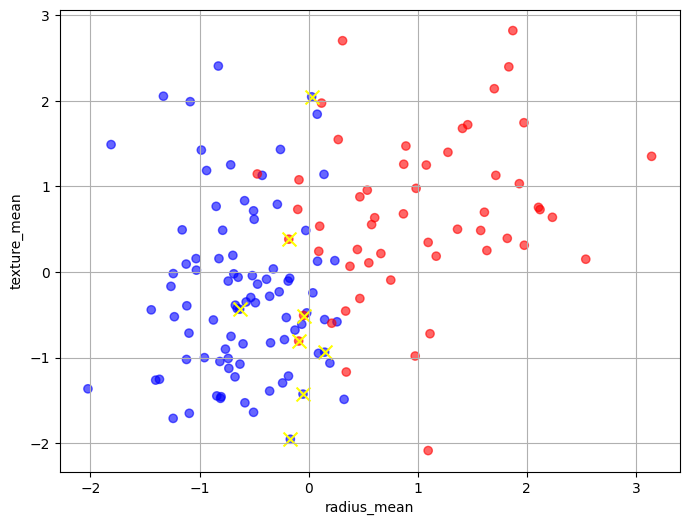

In [227]:
cols2 = ['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean']
X2 = df[cols2].values

X2_train, X2_test = X2[train_indexes], X2[test_indexes]

scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)
lr2 = LogisticRegression(penalty=None)
lr2.fit(X2_train, y_train)

print('Training set:')
print_metrics(y_train, lr2.predict(X2_train))
print()
print('Test set:')
print_metrics(y_test, lr2.predict(X2_test))

y_pred = lr2.predict(X2_test)
plot_classification(X2_test,y_test,y_pred)

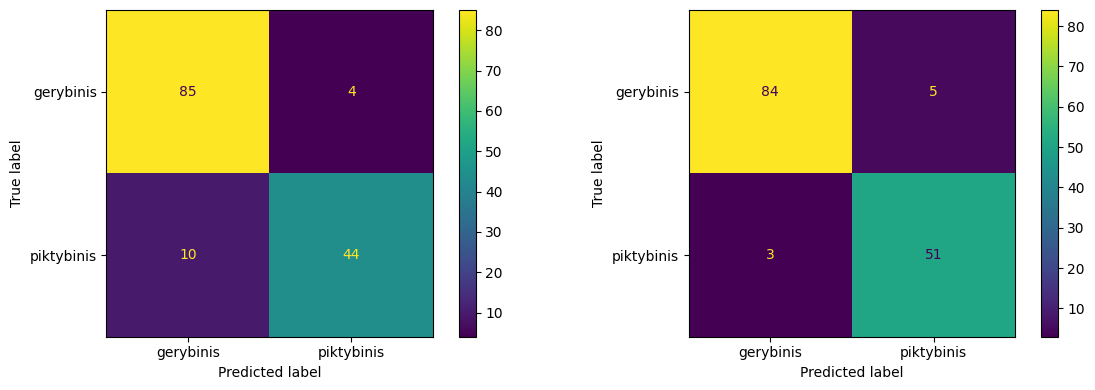

In [228]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classes = ['gerybinis', 'piktybinis']
# Confusion matrices of both classification models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ConfusionMatrixDisplay.from_estimator(
    lr1, X_test, y_test, display_labels=classes, ax=ax1)
ConfusionMatrixDisplay.from_estimator(
    lr2, X2_test, y_test, display_labels=classes, ax=ax2)
plt.tight_layout()

Test set:
Accuracy   : 0.87
Precision  : 0.80
Recall     : 0.87
F1-score   : 0.83


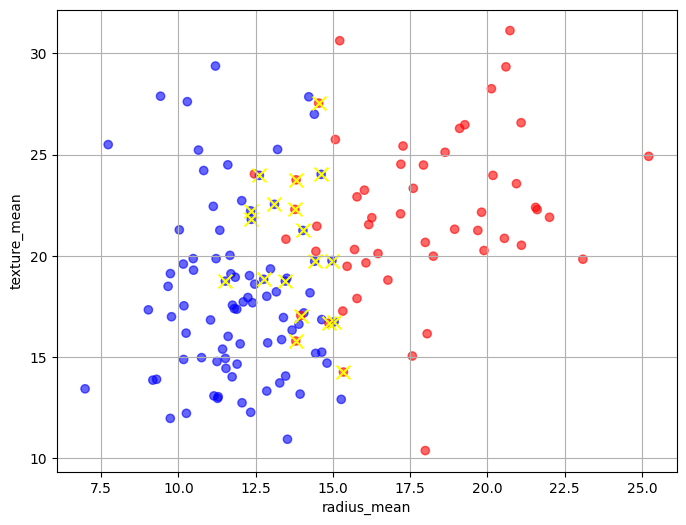

<Figure size 800x600 with 0 Axes>

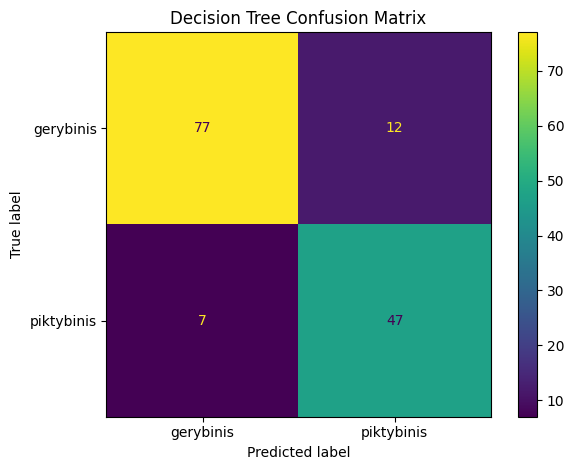

In [229]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    max_depth=8,           
    criterion='gini',     
    min_samples_leaf=5,   
    min_samples_split=9,   
    random_state=42       
)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

print('Test set:')
print_metrics(y_test, y_pred)

plot_classification(X_test,y_test,y_pred)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    clf, 
    X_test, 
    y_test, 
    display_labels=classes
)
plt.title('Decision Tree Confusion Matrix')
plt.tight_layout()


In [230]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3,4, 5,6, 7,8,9, 10],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,3, 4, 5,6,7,8,9, 10],
    'min_samples_leaf': [1, 2,3, 4,5,6,7,8,9,10]
}

# Create grid search
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("\nBest parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best score: 0.8920656634746923


Accuracy   : 0.89
Precision  : 0.91
Recall     : 0.78
F1-score   : 0.84


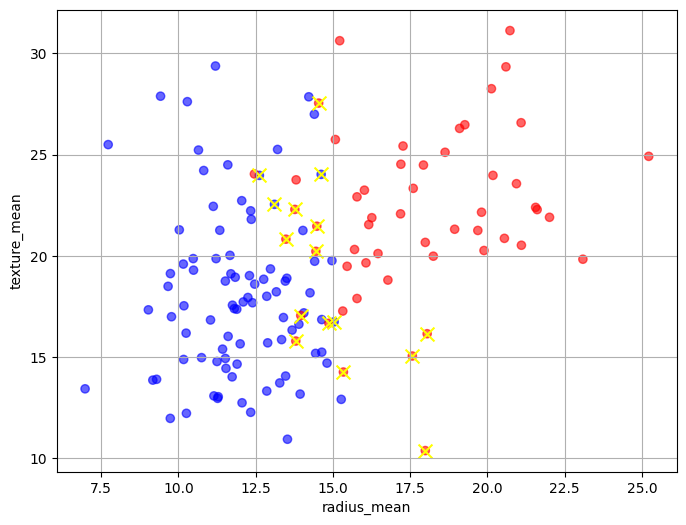

<Figure size 800x600 with 0 Axes>

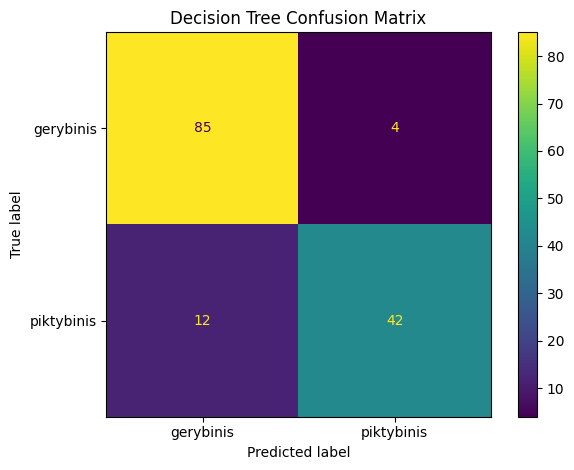

In [231]:
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)
best_y_pred = best_clf.predict(X_test)

print_metrics(y_test, best_y_pred)
plot_classification(X_test,y_test,best_y_pred)

plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(
    best_clf, 
    X_test, 
    y_test, 
    display_labels=classes
)
plt.title('Decision Tree Confusion Matrix')
plt.tight_layout()
